In [ ]:
!pip install nltk wordcloud

#First we download all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# NLTK download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Then we adjust the path
df = pd.read_csv('/content/financial-sentiment.csv')

# Quick check
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (5842, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
# Column info & data types
df.info()

# Summary statistics
df.describe(include='all').T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


,count,unique,top,freq
Sentence,5842,5322,Net sales decreased to EUR 220.5 mn from EUR 4...,2
Sentiment,5842,3,neutral,3130


In [ ]:
# Count & percentage of missing values
missing = df.isnull().sum()
pct = df.isnull().mean() * 100
pd.DataFrame({'missing_count': missing, 'pct_missing': pct}).sort_values('pct_missing', ascending=False)


,missing_count,pct_missing
Sentence,0,0.0
Sentiment,0,0.0


In [ ]:
df.columns = df.columns.str.lower()

sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


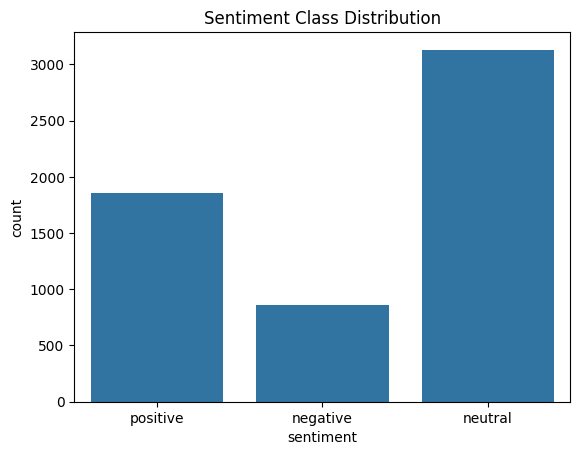

In [ ]:
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Distribution')
plt.show()


In [ ]:
# Show some examples per class
for sentiment in df['sentiment'].unique():
    print(f"\n--- {sentiment} examples ---")
    samples = df[df['sentiment']==sentiment]['sentence'].sample(3, random_state=42).tolist()
    for s in samples:
        print(f"• {s}")



--- positive examples ---
• Sales VAT inclusive expanded by 19 percent , to 351 million euros .
• $FB Big Money Is Pouring Into Facebook From All Directions;http://stks.co/sOwG
• According to CEO Matti Karppinen , Frozen Foods posted a good result in 2010 , as it did in 2009 .

--- negative examples ---
• `` Adjustment to the fall in price level , in contrast , has been less effective .
• Hard to find new buyers of $TSLA at 250.  Shorts continue to pile in.
• Finnlines estimated in its annual general meeting that 2008 will be financially a tough year due to large investments .

--- neutral examples ---
• The fixed acquisition price amounts to NOK 70 ( approximately EUR 8.7 ) million and additional price NOK 15 ( EUR 1.8 ) million at maximum .
• The Finnish company previously said its operating result will be lower than the break-even posted a year earlier .
• Westpac Banking Corp - Is to issue a benchmark , 3 year FRN deal in Euros .


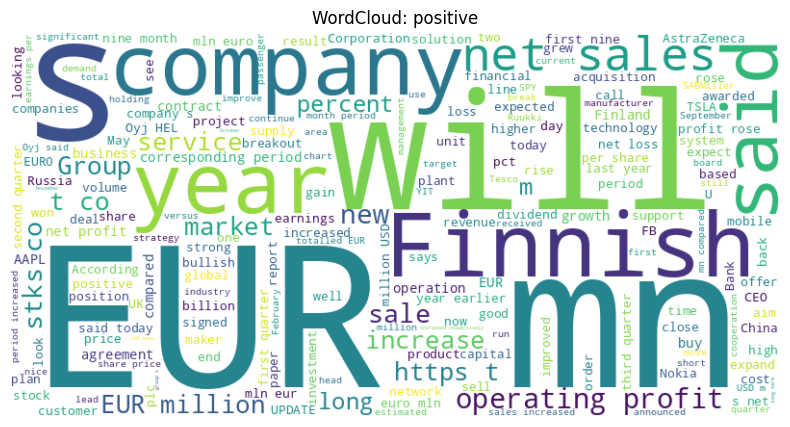

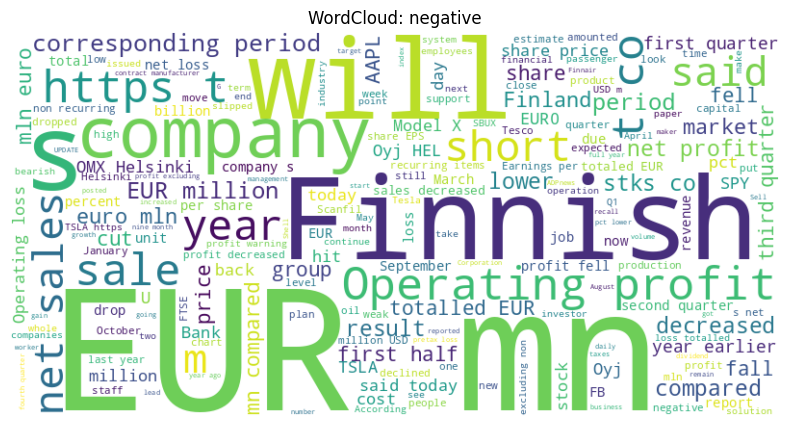

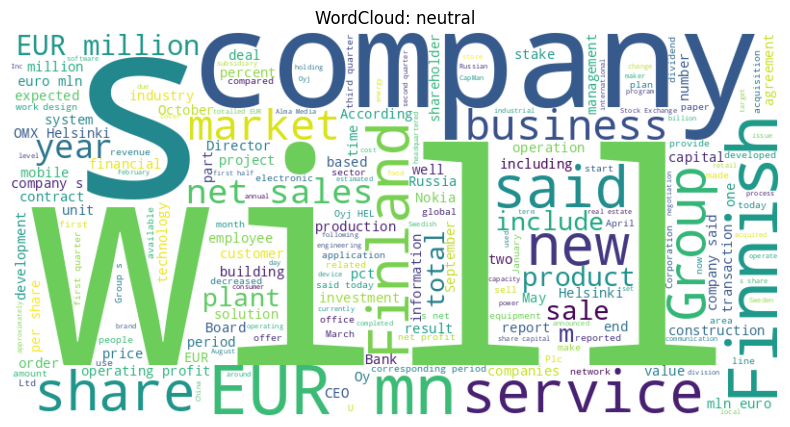

In [ ]:
# Helper to combine all text of a class
def generate_wordcloud(text_series, title):
    combined = " ".join(text_series.dropna().tolist())
    wc = WordCloud(width=800, height=400, background_color='white').generate(combined)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

for sentiment in df['sentiment'].unique():
    generate_wordcloud(df[df['sentiment']==sentiment]['sentence'], f"WordCloud: {sentiment}")


In [ ]:
# 5.1 Define cleaning function (still uses 'sentence')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|@\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [tok for tok in tokens if tok not in stop_words]
    return " ".join(tokens)

# 5.2 Apply cleaning to 'sentence' column
df['clean_sentence'] = df['sentence'].astype(str).apply(clean_text)

# 5.3 Quick check
df[['sentence','clean_sentence']].head(5)


,sentence,clean_sentence
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi lows bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sales doubled eurm...
3,According to the Finnish-Russian Chamber of Co...,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...


In [ ]:
# Save for Week 2 modeling
df.to_csv('/content/financial-sentiment-preprocessed.csv', index=False)
print("Preprocessed data saved!")


Preprocessed data saved!


In [ ]:
# Count rows where clean_sentence is empty
empty_clean = (df['clean_sentence'].str.strip() == '').sum()
print(f"Empty cleaned sentences: {empty_clean}")


Empty cleaned sentences: 1


In [ ]:
# Drop all rows where clean_sentence is empty
df = df[df['clean_sentence'].str.strip() != ''].reset_index(drop=True)
print(f"New shape after dropping empties: {df.shape}")


New shape after dropping empties: (5841, 3)


In [ ]:
# Count duplicates in the raw sentences
dupes = df.duplicated(subset=['sentence']).sum()
print(f"Duplicate raw sentences: {dupes}")

# If you want to drop them:
df = df.drop_duplicates(subset=['sentence']).reset_index(drop=True)
print(f"Shape after dropping duplicates: {df.shape}")


Duplicate raw sentences: 520
Shape after dropping duplicates: (5321, 3)


          char_len     word_len
count  5321.000000  5321.000000
mean     80.937606    11.102612
std      42.903847     5.467504
min       5.000000     1.000000
25%      49.000000     7.000000
50%      70.000000    10.000000
75%     105.000000    14.000000
max     245.000000    38.000000


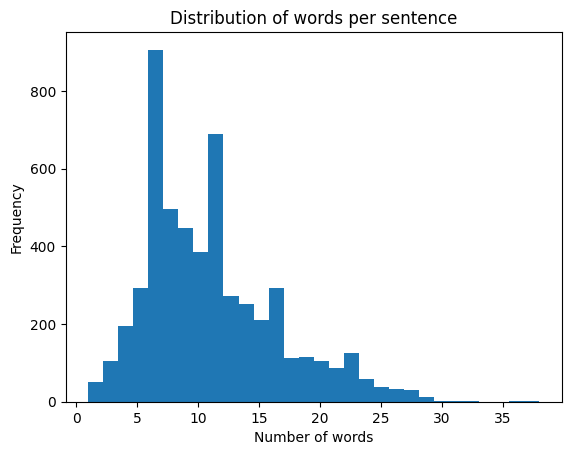

In [ ]:
# Compute lengths of cleaned sentences
df['char_len'] = df['clean_sentence'].str.len()
df['word_len'] = df['clean_sentence'].str.split().apply(len)

# Quick stats
print(df[['char_len', 'word_len']].describe())

# And a simple histogram
plt.hist(df['word_len'], bins=30)
plt.title('Distribution of words per sentence')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# First-time download
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk import pos_tag

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Custom financial stopwords — feel free to add/remove later
custom_stopwords = set(["eur", "euro", "usd", "percent", "mn", "million", "billion", "year", "quarter"])

def clean_advanced(text):
    text = text.lower()

    # Replace URLs & mentions
    text = re.sub(r"http\S+|www\S+|@\w+", "", text)

    # Negation handling: "not good" → "not_good"
    text = re.sub(r"\b(not|no|never|n't)\s+(\w+)", r"\1_\2", text)

    # Remove non-alphabetic characters (except _ used in negation)
    text = re.sub(r"[^a-z_\s]", "", text)

    tokens = word_tokenize(text)

    # Lemmatize with POS tagging
    tagged = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged]

    # Remove stopwords
    filtered = [word for word in lemmatized if word not in stop_words and word not in custom_stopwords]

    return " ".join(filtered)


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

count    5321.000000
mean       11.102612
std         5.467504
min         1.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        38.000000
Name: word_len, dtype: float64


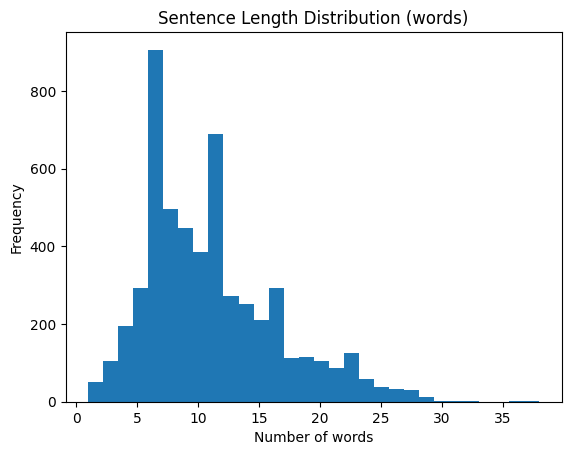

In [ ]:
df['word_len'] = df['clean_sentence'].str.split().apply(len)

# Summary
print(df['word_len'].describe())

# Histogram
plt.hist(df['word_len'], bins=30)
plt.title("Sentence Length Distribution (words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Before → After (first 10 rows):
                                                                                                                                                                                                                  sentence                                                                                                                                                                      clean_sentence
The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . geosolutions technology leverage benefon gps solution provide location base search technology community platform location relevant multimedia content new powerful commercial model
                                                                                                                                                                   $ESI on

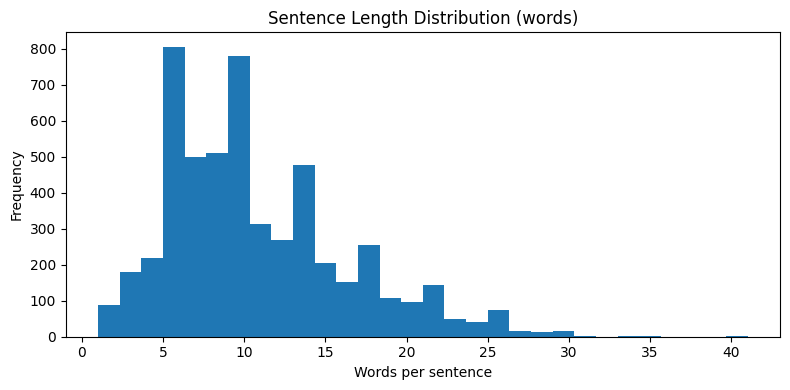

In [ ]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# ── 1. Download required NLTK resources ───────────────────────────────────────
nltk.download('punkt')                         # tokenizer models
nltk.download('punkt_tab')                     # sentence-split model
nltk.download('stopwords')                     # stopword lists
nltk.download('wordnet')                       # WordNet data
nltk.download('omw-1.4')                       # WordNet multilingual data
nltk.download('averaged_perceptron_tagger')    # POS tagger
nltk.download('averaged_perceptron_tagger_eng')# additional tagger model

# ── 2. Helper: map Treebank POS → WordNet POS ────────────────────────────────
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# ── 3. Initialize lemmatizer & stopword sets ─────────────────────────────────
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = {
    "eur", "euro", "usd", "percent",
    "mn", "million", "billion",
    "year", "quarter"
}

# ── 4. Advanced cleaning function ─────────────────────────────────────────────
def clean_advanced(text: str) -> str:
    text = text.lower()
    # remove URLs and mentions
    text = re.sub(r"http\S+|www\S+|@\w+", "", text)
    # combine negation with next word: "not good" → "not_good"
    text = re.sub(r"\b(?:not|no|never|n't)\s+(\w+)", r"not_\1", text)
    # keep only letters, underscores, and spaces
    text = re.sub(r"[^a-z_\s]", " ", text)

    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    # lemmatize each token with its POS
    lemmas = [
        lemmatizer.lemmatize(tok, get_wordnet_pos(pos))
        for tok, pos in tagged
    ]
    # filter out stopwords and custom financial terms
    filtered = [
        w for w in lemmas
        if w not in stop_words
        and w not in custom_stopwords
        and w.strip()
    ]
    return " ".join(filtered)

# ── 5. Apply cleaning pipeline to your DataFrame ──────────────────────────────
# Make sure df is already defined and has a 'sentence' column
df['clean_sentence'] = (
    df['sentence']
    .astype(str)
    .apply(clean_advanced)
)

# Drop any rows that became empty
df = df[df['clean_sentence'].str.strip() != ""].reset_index(drop=True)

# ── 6. Preview the results ───────────────────────────────────────────────────
print("Before → After (first 10 rows):")
print(df[['sentence', 'clean_sentence']].head(10).to_string(index=False))

# ── 7. Re‑check sentence length distribution ─────────────────────────────────
df['word_len'] = df['clean_sentence'].str.split().apply(len)
print("\nWord count summary:")
print(df['word_len'].describe())

plt.figure(figsize=(8, 4))
plt.hist(df['word_len'], bins=30)
plt.title("Sentence Length Distribution (words)")
plt.xlabel("Words per sentence")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# ── Week 2: Load Preprocessed Data ──
import pandas as pd
from sklearn.model_selection import train_test_split

# 1️⃣ Read in the CSV you saved at the end of Week 1
df = pd.read_csv('/content/financial-sentiment-preprocessed.csv')
# (If you saved it elsewhere, adjust the path accordingly)

# 2️⃣ Quick sanity check
print("Columns:", df.columns.tolist())
print("Shape:", df.shape)
df.head()


Columns: ['sentence', 'sentiment', 'clean_sentence']
Shape: (5842, 3)


,sentence,sentiment,clean_sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi lows bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sales doubled eurm...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...


In [ ]:
# ── Right after loading df, before train_test_split ──

# 1️⃣ Drop rows where clean_sentence is missing or empty
df = df.dropna(subset=['clean_sentence'])
df = df[df['clean_sentence'].str.strip() != ''].reset_index(drop=True)

# 2️⃣ (Optional) sanity-check
print("Any NaNs in clean_sentence?", df['clean_sentence'].isnull().any())
print("Empty strings in clean_sentence:", (df['clean_sentence'].str.strip()=='').sum())
print("New shape:", df.shape)

# 3️⃣ Now do your train_test_split as before
from sklearn.model_selection import train_test_split

X = df['clean_sentence']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Any NaNs in clean_sentence? False
Empty strings in clean_sentence: 0
New shape: (5841, 3)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# If you saved your preprocessed file:
# df = pd.read_csv('/content/financial-sentiment-preprocessed.csv')

# Or continue with df in memory:
# (Ensure df has 'clean_sentence' and 'sentiment' columns)
print("Dataset shape before split:", df.shape)

# Features & labels
X = df['clean_sentence']
y = df['sentiment']

# Stratified split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)


Dataset shape before split: (5841, 3)
Train set: (4672,) Test set: (1169,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# 2.1 Vectorize with CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv  = cv.transform(X_test)

# 2.2 Train NB
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

# 2.3 Evaluate
y_pred_nb = nb.predict(X_test_cv)
print("=== Naive Bayes Classification Report ===")
print(classification_report(y_test, y_pred_nb))

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
print("Confusion Matrix (rows=true, cols=pred):")
print(pd.DataFrame(cm_nb, index=nb.classes_, columns=nb.classes_))


=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

    negative       0.36      0.30      0.33       172
     neutral       0.74      0.81      0.77       626
    positive       0.70      0.67      0.69       371

    accuracy                           0.69      1169
   macro avg       0.60      0.59      0.60      1169
weighted avg       0.68      0.69      0.68      1169

Confusion Matrix (rows=true, cols=pred):
          negative  neutral  positive
negative        51       74        47
neutral         65      504        57
positive        24       99       248


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 3.1 Vectorize with TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# 3.2 Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

# 3.3 Evaluate
y_pred_lr = lr.predict(X_test_tfidf)
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
print(pd.DataFrame(cm_lr, index=lr.classes_, columns=lr.classes_))


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

    negative       0.37      0.12      0.18       172
     neutral       0.68      0.90      0.77       626
    positive       0.76      0.59      0.67       371

    accuracy                           0.68      1169
   macro avg       0.60      0.53      0.54      1169
weighted avg       0.66      0.68      0.65      1169

          negative  neutral  positive
negative        20      121        31
neutral         28      561        37
positive         6      146       219


In [ ]:
from sklearn.svm import SVC

# 4.1 TF-IDF with bigrams
tfidf_2 = TfidfVectorizer(ngram_range=(1,2), min_df=5)
X_train_t2 = tfidf_2.fit_transform(X_train)
X_test_t2  = tfidf_2.transform(X_test)

# 4.2 Train SVM (linear kernel)
svm = SVC(kernel='linear')
svm.fit(X_train_t2, y_train)

# 4.3 Evaluate
y_pred_svm = svm.predict(X_test_t2)
print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
print(pd.DataFrame(cm_svm, index=svm.classes_, columns=svm.classes_))


=== SVM Classification Report ===
              precision    recall  f1-score   support

    negative       0.30      0.10      0.15       172
     neutral       0.70      0.88      0.78       626
    positive       0.75      0.63      0.68       371

    accuracy                           0.69      1169
   macro avg       0.58      0.54      0.54      1169
weighted avg       0.65      0.69      0.66      1169

          negative  neutral  positive
negative        18      119        35
neutral         28      554        44
positive        15      123       233


In [ ]:
# Collect metrics into a DataFrame
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Naive Bayes': y_pred_nb,
    'Logistic Regression': y_pred_lr,
    'SVM (1‑2 grams)': y_pred_svm
}

rows = []
for name, y_pred in models.items():
    rows.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
        'F1‑score (macro)': f1_score(y_test, y_pred, average='macro')
    })

results_df = pd.DataFrame(rows).set_index('Model')
print(results_df)


                     Accuracy  Precision (macro)  Recall (macro)  \
Model                                                              
Naive Bayes          0.686912           0.604431        0.590029   
Logistic Regression  0.684346           0.603658        0.534247   
SVM (1‑2 grams)      0.688623           0.579286        0.539223   

                     F1‑score (macro)  
Model                                  
Naive Bayes                  0.595518  
Logistic Regression          0.538103  
SVM (1‑2 grams)              0.538658  


In [ ]:
# 1.1 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# 1.2 Load preprocessed data
df = pd.read_csv('/content/financial-sentiment-preprocessed.csv')
# drop any empty clean sentences
df = df.dropna(subset=['clean_sentence'])
df = df[df['clean_sentence'].str.strip() != ''].reset_index(drop=True)

# 1.3 Train/Test split (80/20 stratified)
X = df['clean_sentence']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (4672,) Test: (1169,)


In [ ]:
# 2.1 Install & import lexicon tools
!pip install nltk textblob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# 2.2 Define functions to extract lexicon & text stats
sia = SentimentIntensityAnalyzer()

def extract_features(texts):
    feats = []
    for doc in texts:
        # VADER scores
        vd = sia.polarity_scores(doc)
        # TextBlob polarity and subjectivity
        tb = TextBlob(doc)
        feats.append({
            'vader_pos': vd['pos'],
            'vader_neg': vd['neg'],
            'vader_neu': vd['neu'],
            'vader_compound': vd['compound'],
            'tb_polarity': tb.polarity,
            'tb_subjectivity': tb.subjectivity,
            'char_count': len(doc),
            'word_count': len(doc.split()),
            'avg_word_len': np.mean([len(w) for w in doc.split()]) if doc.split() else 0
        })
    return pd.DataFrame(feats)

# 2.3 Compute lexicon+stat features
lex_train = extract_features(X_train)
lex_test  = extract_features(X_test)

# 2.4 Vectorize text via TF‑IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# 2.5 Combine TF‑IDF matrix and lex‑stat features
from scipy.sparse import hstack
X_train_rfc = hstack([X_train_tfidf, lex_train.values])
X_test_rfc  = hstack([X_test_tfidf,  lex_test.values])

print("Feature matrix shapes:", X_train_rfc.shape, X_test_rfc.shape)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Feature matrix shapes: (4672, 2461) (1169, 2461)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 3.1 Define param grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# 3.2 Grid Search with 3‑fold CV (on training split)
rfc = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rfc, param_grid, cv=3, n_jobs=-1, scoring='f1_macro')
grid.fit(X_train_rfc, y_train)

print("Best RF params:", grid.best_params_)

# 3.3 Evaluate on test set
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_rfc)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=best_rf.classes_)
print("Confusion Matrix:")
print(pd.DataFrame(cm_rf, index=best_rf.classes_, columns=best_rf.classes_))


Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
=== Random Forest Classification Report ===
              precision    recall  f1-score   support

    negative       0.18      0.15      0.16       172
     neutral       0.66      0.78      0.71       626
    positive       0.76      0.60      0.67       371

    accuracy                           0.63      1169
   macro avg       0.53      0.51      0.52      1169
weighted avg       0.62      0.63      0.62      1169

Confusion Matrix:
          negative  neutral  positive
negative        25      123        24
neutral         94      487        45
positive        19      129       223


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-04-19 05:21:07--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-19 05:21:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-19 05:21:08--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!pip install keras_preprocessing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
# week 3

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Set hyperparams
MAX_NUM_WORDS = 10000
MAX_SEQ_LEN = 100
EMBEDDING_DIM = 100

# Tokenize
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_sentence'])
X = tokenizer.texts_to_sequences(df['clean_sentence'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])
y = to_categorical(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Load GloVe embeddings
emb_index = {}
with open('/content/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        emb_index[word] = vector

# Create embedding matrix
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    vec = emb_index.get(word)
    if vec is not None:
        embedding_matrix[i] = vec

# Build model
model = Sequential([
    Embedding(input_dim=num_words,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_SEQ_LEN,
              trainable=False),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4961 - loss: 1.0199 - val_accuracy: 0.5427 - val_loss: 0.9358
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5335 - loss: 0.9430 - val_accuracy: 0.5598 - val_loss: 0.9017
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5583 - loss: 0.9032 - val_accuracy: 0.5855 - val_loss: 0.8801
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5774 - loss: 0.8768 - val_accuracy: 0.5769 - val_loss: 0.8658
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5851 - loss: 0.8610 - val_accuracy: 0.6218 - val_loss: 0.8502
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6226 - loss: 0.8290 - val_accuracy: 0.6303 - val_loss: 0.8393
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6224 - loss: 0.8319 - val_accuracy: 0.6282 - val_loss: 0.8299
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 0.8189 - val_accuracy: 0

In [ ]:
!pip install transformers==4.33.2 datasets==2.14.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np


/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [ ]:
# Assuming you have 'clean_sentence' and 'sentiment' columns
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment'].map(label_map)

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['clean_sentence'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)


In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
optimizer = AdamW(model.parameters(), lr=2e-5)

model.train()
for epoch in range(3):  # 3 epochs
    print(f"Epoch {epoch+1}")
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print("Epoch done.\n")


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1
Epoch done.

Epoch 2
Epoch done.

Epoch 3
Epoch done.



In [ ]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()
preds = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds += torch.argmax(logits, axis=1).tolist()
        true_labels += batch['labels'].tolist()

print("=== BERT Classification Report ===")
print(classification_report(true_labels, preds, target_names=label_map.keys()))


=== BERT Classification Report ===
              precision    recall  f1-score   support

    negative       0.44      0.34      0.38       172
     neutral       0.78      0.84      0.81       626
    positive       0.80      0.77      0.78       371

    accuracy                           0.75      1169
   macro avg       0.67      0.65      0.66      1169
weighted avg       0.73      0.75      0.74      1169



In [ ]:
#@markdown ## 1️⃣ Setup & Imports

# Install packages
!pip install -q nltk wordcloud transformers datasets torch tensorflow pyyaml textblob

# Imports
import os, re, yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Sklearn
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics         import classification_report, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.naive_bayes     import MultinomialNB
from sklearn.svm             import SVC

# HuggingFace
import torch
from datasets import Dataset
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer, TrainingArguments
)

# Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text     import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models                 import Sequential
from tensorflow.keras.layers                import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks              import EarlyStopping, ModelCheckpoint

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Upload the CSV interactively
from google.colab import files
uploaded = files.upload()  # click “Choose Files” and select your financial‑sentiment.csv

# It’ll now live in /content – re‑run your load
import pandas as pd
df = pd.read_csv('financial-sentiment.csv')
print("Raw shape:", df.shape)
df.head()


Saving financial-sentiment.csv to financial-sentiment (1).csv
Raw shape: (5842, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
#@markdown ## 2️⃣ Configuration & Data Load

# You can tweak hyperparams here or load from config.yaml
cfg = {
    'raw_path':      '/content/financial-sentiment.csv',
    'clean_path':    '/content/financial-sentiment-preprocessed.csv',
    'test_size':     0.2,
    'random_state':  42,
    'custom_stops':  ["eur","euro","usd","percent","mn","million","billion","year","quarter"],
    'max_vocab':     10000,
    'max_seq_len':   100,
    'glove_path':    '/content/glove.6B.100d.txt'
}

# Load raw CSV
df = pd.read_csv(cfg['raw_path'])
print("Raw shape:", df.shape)
df.head()


Raw shape: (5842, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df['clean_sentence'] = df['Sentence'].str.lower().str.replace(r'[^\w\s]', '', regex=True)


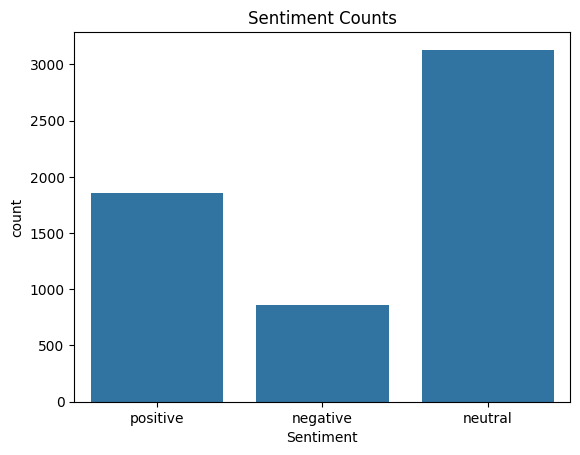

In [ ]:
#@markdown ## 3️⃣ Exploratory Data Analysis

# Class distribution
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Counts"); plt.show()


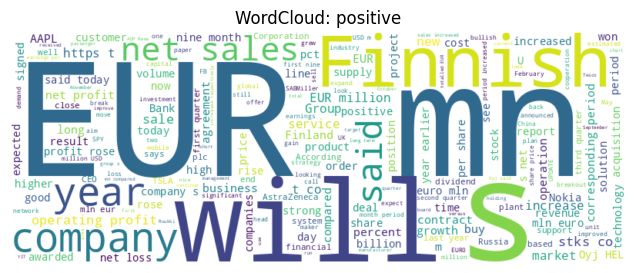

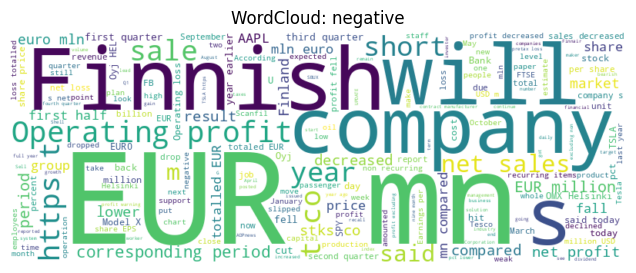

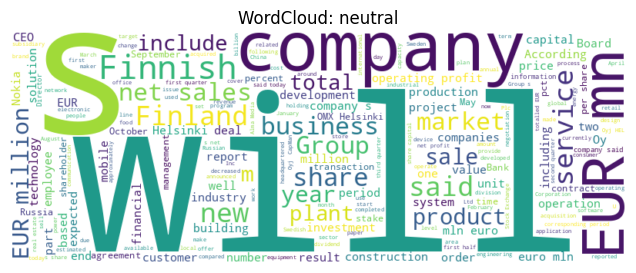

In [ ]:
# WordCloud per class
from wordcloud import WordCloud

for lbl in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment']==lbl]['Sentence'].astype(str))
    wc = WordCloud(width=800, height=300, background_color='white').generate(text)
    plt.figure(figsize=(8,3)); plt.imshow(wc, interpolation='bilinear')
    plt.axis('off'); plt.title(f"WordCloud: {lbl}"); plt.show()

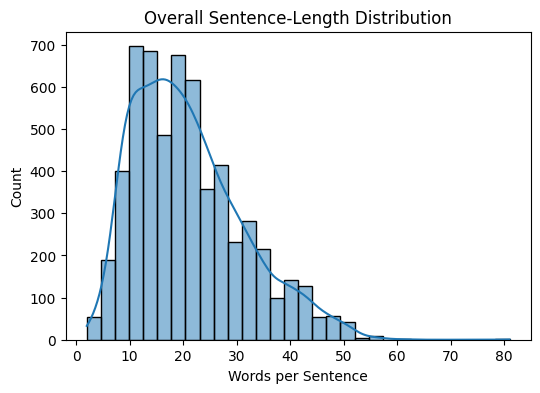

In [ ]:
# Extra EDA Visualizations

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# 1️⃣ Sentence‐Length Distribution
df['sent_len'] = df['Sentence'].str.split().apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df['sent_len'], bins=30, kde=True)
plt.title("Overall Sentence‐Length Distribution")
plt.xlabel("Words per Sentence")
plt.ylabel("Count")
plt.show()


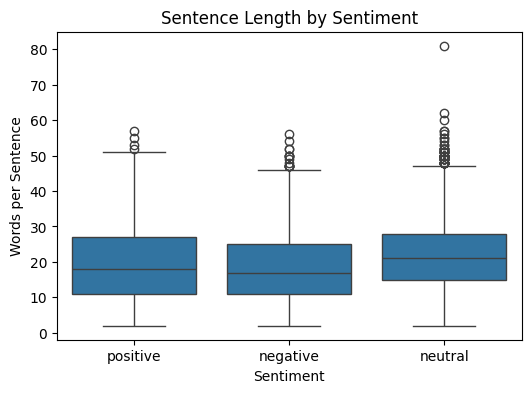

In [ ]:
# 2️⃣ Sentence‐Length by Sentiment Class
plt.figure(figsize=(6,4))
sns.boxplot(x='Sentiment', y='sent_len', data=df)
plt.title("Sentence Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Words per Sentence")
plt.show()


<ipython-input-52-bb01fe0ef957>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uni_counts, y=uni_feats, palette='mako')


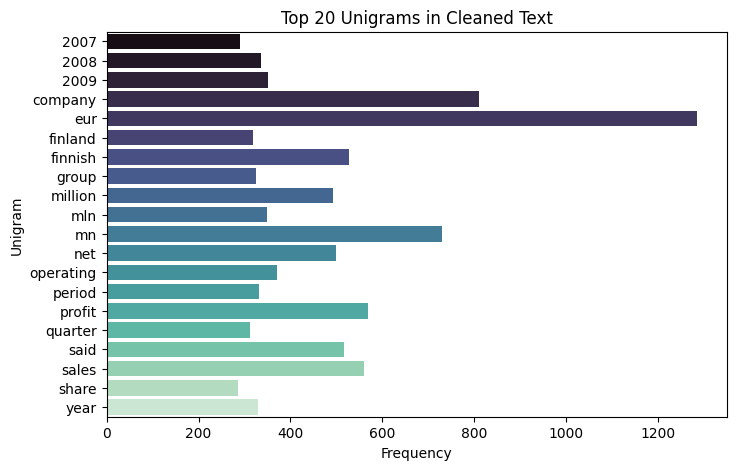

In [ ]:
# 3️⃣ Top 20 Unigrams (after cleaning)
cv_uni = CountVectorizer(stop_words='english', max_features=20)
X_uni = cv_uni.fit_transform(df['clean_sentence'])
uni_counts = np.asarray(X_uni.sum(axis=0)).ravel()
uni_feats  = cv_uni.get_feature_names_out()

plt.figure(figsize=(8,5))
sns.barplot(x=uni_counts, y=uni_feats, palette='mako')
plt.title("Top 20 Unigrams in Cleaned Text")
plt.xlabel("Frequency")
plt.ylabel("Unigram")
plt.show()


<ipython-input-53-3cbad2716045>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bi_counts, y=bi_feats, palette='viridis')


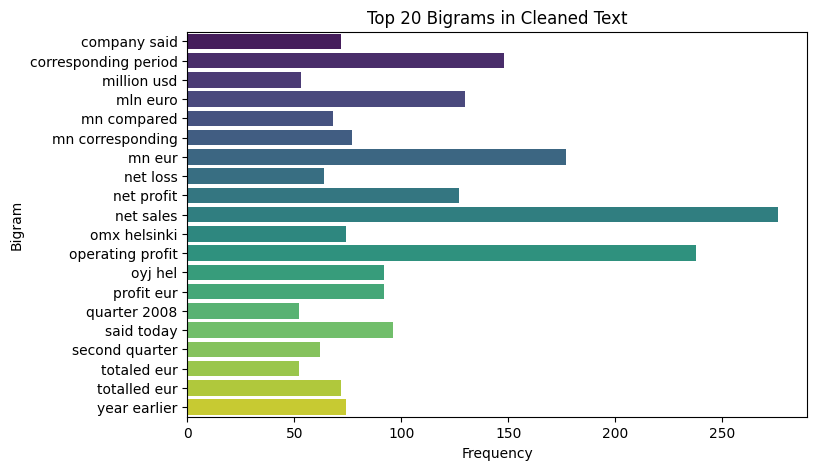

In [ ]:
# 4️⃣ Top 20 Bigrams
cv_bi = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
X_bi = cv_bi.fit_transform(df['clean_sentence'])
bi_counts = np.asarray(X_bi.sum(axis=0)).ravel()
bi_feats  = cv_bi.get_feature_names_out()

plt.figure(figsize=(8,5))
sns.barplot(x=bi_counts, y=bi_feats, palette='viridis')
plt.title("Top 20 Bigrams in Cleaned Text")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
#@markdown ## 4️⃣ Advanced Preprocessing

# Helper POS‐mapper
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    if tag.startswith('V'): return wordnet.VERB
    if tag.startswith('N'): return wordnet.NOUN
    if tag.startswith('R'): return wordnet.ADV
    return wordnet.NOUN

# Cleaner class
class FinancialCleaner:
    def __init__(self, custom_stops):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words  = set(stopwords.words('english')) | set(custom_stops)

    def __call__(self, text):
        text = str(text).lower()
        text = re.sub(r"http\S+|www\S+|@\w+", "", text)
        text = re.sub(r"\b(not|no|never|n't)\s+(\w+)",
                      lambda m: f"{m.group(1)}_{m.group(2)}", text)
        text = re.sub(r"[^a-z_\s]", " ", text)
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        lemmas = [ self.lemmatizer.lemmatize(tok, get_wordnet_pos(pos))
                   for tok,pos in tagged ]
        return " ".join([w for w in lemmas if w not in self.stop_words and w.strip()])

cleaner = FinancialCleaner(cfg['custom_stops'])

df['clean_sentence'] = df['Sentence'].apply(cleaner)
df = df[df['clean_sentence'].str.strip()!=''].reset_index(drop=True)
print("Clean shape:", df.shape)
df[['Sentence','clean_sentence']].head()


Clean shape: (5841, 4)


,Sentence,clean_sentence
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last componenta net sale double period earlier...
3,According to the Finnish-Russian Chamber of Co...,accord finnish russian chamber commerce major ...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sell remain stake almost e...


In [ ]:
cleaner = FinancialCleaner(cfg['custom_stops'])

df['clean_sentence'] = df['Sentence'].apply(cleaner)
df = df[df['clean_sentence'].str.strip() != ''].reset_index(drop=True)
print("Clean shape:", df.shape)
df[['Sentence', 'clean_sentence']].head()


Clean shape: (5841, 4)


,Sentence,clean_sentence
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last componenta net sale double period earlier...
3,According to the Finnish-Russian Chamber of Co...,accord finnish russian chamber commerce major ...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sell remain stake almost e...


In [ ]:
#@markdown ### Train/Test Split

X = df['clean_sentence']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=cfg['test_size'],
    stratify=y,
    random_state=cfg['random_state']
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (4672,) Test: (1169,)


In [ ]:
#@markdown ## 5️⃣ Models Implementation: Naive Bayes (CountVectorizer + MultinomialNB)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score  # Import accuracy_score

cv = CountVectorizer(ngram_range=(1,1), min_df=5, stop_words='english')
Xtr_cv = cv.fit_transform(X_train)
Xte_cv = cv.transform(X_test)

nb = MultinomialNB(alpha=1.0)
nb.fit(Xtr_cv, y_train)

y_pred = nb.predict(Xte_cv) # Get predictions

print("▶️ Naive Bayes Results")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"▶️ Naive Bayes Accuracy: {accuracy:.4f}")

▶️ Naive Bayes Results
              precision    recall  f1-score   support

    negative       0.37      0.44      0.40       172
     neutral       0.78      0.76      0.77       626
    positive       0.72      0.67      0.69       371

    accuracy                           0.69      1169
   macro avg       0.62      0.63      0.62      1169
weighted avg       0.70      0.69      0.69      1169

▶️ Naive Bayes Accuracy: 0.6869


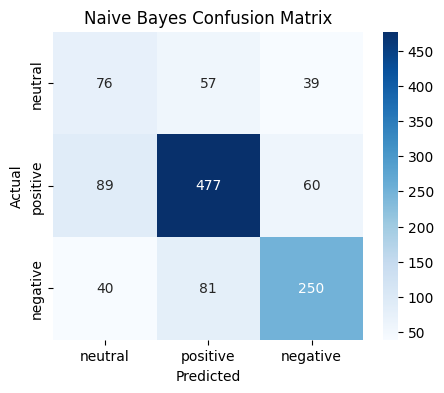

In [ ]:
# —— Naive Bayes Confusion Matrix ——
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute
cm = confusion_matrix(y_test, nb.predict(Xte_cv))
labels = ['neutral','positive','negative']  # adjust to your label order

# plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


▶️ SVM Results
              precision    recall  f1-score   support

    negative       0.34      0.59      0.43       172
     neutral       0.80      0.67      0.73       626
    positive       0.73      0.67      0.70       371

    accuracy                           0.66      1169
   macro avg       0.62      0.65      0.62      1169
weighted avg       0.71      0.66      0.68      1169

▶️ SVM Accuracy: 0.6604



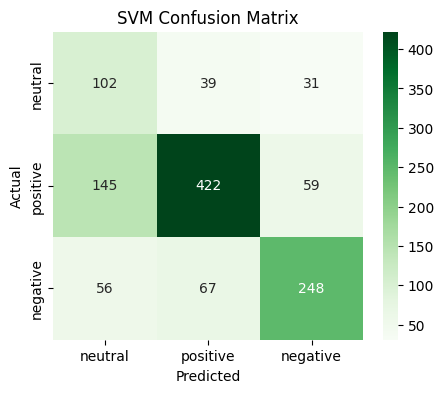

In [ ]:
#@markdown ## 6️⃣ SVM (TF‑IDF + Linear SVC)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ... (assuming X_train, X_test, y_train, y_test are already defined) ...

svm_vec = TfidfVectorizer(ngram_range=(1,2), min_df=5, stop_words='english')
Xtr_svm = svm_vec.fit_transform(X_train)
Xte_svm = svm_vec.transform(X_test)

svm = SVC(kernel='linear', C=1.0, class_weight='balanced')
svm.fit(Xtr_svm, y_train)

print("▶️ SVM Results")

# Get predictions
y_pred_svm = svm.predict(Xte_svm)

# Print classification report
print(classification_report(y_test, y_pred_svm))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"▶️ SVM Accuracy: {accuracy:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm) # Use y_pred_svm for the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels) # Make sure 'labels' is defined
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



▶️ Logistic Regression
              precision    recall  f1-score   support

    negative       0.38      0.57      0.46       172
     neutral       0.79      0.71      0.75       626
    positive       0.73      0.70      0.72       371

    accuracy                           0.69      1169
   macro avg       0.64      0.66      0.64      1169
weighted avg       0.72      0.69      0.70      1169

▶️ Logistic Regression Accuracy: 0.6869



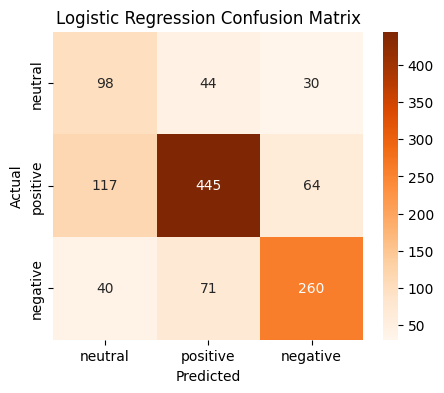

In [ ]:
#@markdown ## 7️⃣ Baseline (TF-IDF + Logistic Regression)

# Baseline: TF-IDF + Logistic Regression
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, stop_words='english')
Xtr_tfidf = tfidf.fit_transform(X_train)
Xte_tfidf = tfidf.transform(X_test)

lr = LogisticRegression(class_weight='balanced', max_iter=1000, C=1.0, solver='saga')
lr.fit(Xtr_tfidf, y_train)
print("▶️ Logistic Regression")
print(classification_report(y_test, lr.predict(Xte_tfidf)))

# Calculate accuracy
accuracy = accuracy_score(y_test, lr.predict(Xte_tfidf))

# Print accuracy before confusion matrix
print(f"▶️ Logistic Regression Accuracy: {accuracy:.4f}\n")

# —— Logistic Regression Confusion Matrix ——
cm = confusion_matrix(y_test, lr.predict(Xte_tfidf))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


▶️ Lex+RF (best_params) {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

    negative       0.37      0.53      0.43       172
     neutral       0.74      0.64      0.69       626
    positive       0.60      0.61      0.61       371

    accuracy                           0.62      1169
   macro avg       0.57      0.59      0.58      1169
weighted avg       0.64      0.62      0.62      1169

▶️  Lexicon + Random Forest Accuracy: 0.6869



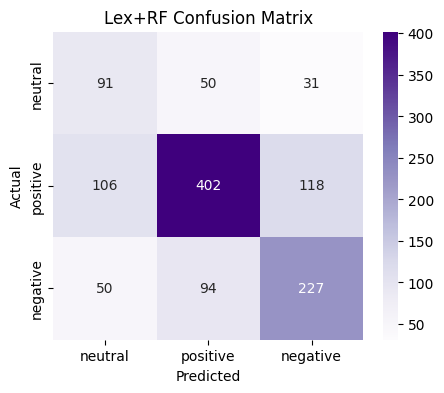

In [ ]:
#@markdown ## 8️⃣ Lexicon + Random Forest

# Lexicon+RF
# 1. Extract features
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def lex_stats(doc):
    vd = sia.polarity_scores(doc)
    tb = TextBlob(doc)
    return {
      'vader_pos': vd['pos'],
      'vader_neg': vd['neg'],
      'vader_neu': vd['neu'],
      'vader_compound': vd['compound'],
      'tb_polarity': tb.polarity,
      'tb_subjectivity': tb.subjectivity,
      'char_count': len(doc),
      'word_count': len(doc.split()),
      'avg_word_len': np.mean([len(w) for w in doc.split()]) or 0
    }

lex_tr = pd.DataFrame([lex_stats(d) for d in X_train])
lex_te = pd.DataFrame([lex_stats(d) for d in X_test])

from scipy.sparse import hstack
Xtr_comb = hstack([Xtr_tfidf, lex_tr.values])
Xte_comb = hstack([Xte_tfidf, lex_te.values])

rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
grid = GridSearchCV(rfc,
                    {'n_estimators':[100,200],'max_depth':[None,10,20],'min_samples_split':[2,5]},
                    cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(Xtr_comb, y_train)

print("▶️ Lex+RF (best_params)", grid.best_params_)
print(classification_report(y_test, grid.predict(Xte_comb)))

# Calculate accuracy
accuracy = accuracy_score(y_test, lr.predict(Xte_tfidf))

# Print accuracy before confusion matrix
print(f"▶️  Lexicon + Random Forest Accuracy: {accuracy:.4f}\n")

# —— Lexicon+RF Confusion Matrix ——
cm = confusion_matrix(y_test, grid.predict(Xte_comb))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.title("Lex+RF Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#@markdown ## 9️⃣ Neural Network
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1️⃣ Sample config
cfg = {
    'max_vocab': 10000,
    'max_seq_len': 100
}

# 2️⃣ Sample data (replace with your actual data)
# X → text list, y → category list
X = ["I love this product", "This is terrible", "Absolutely fantastic!", "Worst ever", "Okayish experience"]
y = ["positive", "negative", "positive", "negative", "neutral"]


# 4️⃣ Label encoding
le = LabelEncoder()
y_train_enc = tf.keras.utils.to_categorical(le.fit_transform(y_train))
y_test_enc = tf.keras.utils.to_categorical(le.transform(y_test))

# 5️⃣ TextVectorization layer
vectorizer = TextVectorization(max_tokens=cfg['max_vocab'], output_sequence_length=cfg['max_seq_len'])
vectorizer.adapt(X_train)

# 6️⃣ Model definition
model = Sequential([
    vectorizer,
    Embedding(input_dim=cfg['max_vocab'], output_dim=100),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # update to number of classes in your case
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 7️⃣ Callbacks
es = EarlyStopping(patience=2, restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', save_best_only=True)

# 8️⃣ Train the model
history = model.fit(
    x=np.array(X_train),
    y=y_train_enc,
    validation_split=0.1,
    epochs=40,
    batch_size=32,
    callbacks=[es, mc]
)

# 9️⃣ Evaluate
loss, acc = model.evaluate(np.array(X_test), y_test_enc, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_3            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
131/132 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4874 - loss: 1.0077

132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4879 - loss: 1.0075 - val_accuracy: 0.5342 - val_loss: 0.9738
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5408 - loss: 0.9766 - val_accuracy: 0.5342 - val_loss: 0.9800
Epoch 3/40
129/132 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5373 - loss: 0.9827

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5373 - loss: 0.9826 - val_accuracy: 0.5342 - val_loss: 0.9710
Epoch 4/40
127/132 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5295 - loss: 0.9856

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5298 - loss: 0.9853 - val_accuracy: 0.5342 - val_loss: 0.9623
Epoch 5/40
126/132 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5391 - loss: 0.9700

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5390 - loss: 0.9697 - val_accuracy: 0.5406 - val_loss: 0.9603
Epoch 6/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5663 - loss: 0.9309 - val_accuracy: 0.5812 - val_loss: 0.9630
Epoch 7/40
123/132 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5977 - loss: 0.8826

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5982 - loss: 0.8815 - val_accuracy: 0.6410 - val_loss: 0.8728
Epoch 8/40
131/132 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6632 - loss: 0.7790

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6632 - loss: 0.7789 - val_accuracy: 0.6410 - val_loss: 0.8391
Epoch 9/40
127/132 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6839 - loss: 0.7218

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6845 - loss: 0.7211 - val_accuracy: 0.6838 - val_loss: 0.8013
Epoch 10/40
124/132 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7574 - loss: 0.6263

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7558 - loss: 0.6279 - val_accuracy: 0.7009 - val_loss: 0.7654
Epoch 11/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7547 - loss: 0.5871 - val_accuracy: 0.6774 - val_loss: 0.7729
Epoch 12/40
130/132 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8093 - loss: 0.5006

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8090 - loss: 0.5008 - val_accuracy: 0.6944 - val_loss: 0.7286
Epoch 13/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8027 - loss: 0.4823 - val_accuracy: 0.6453 - val_loss: 0.7890
Epoch 14/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8170 - loss: 0.4570 - val_accuracy: 0.6496 - val_loss: 1.0020
Test Accuracy: 0.6843


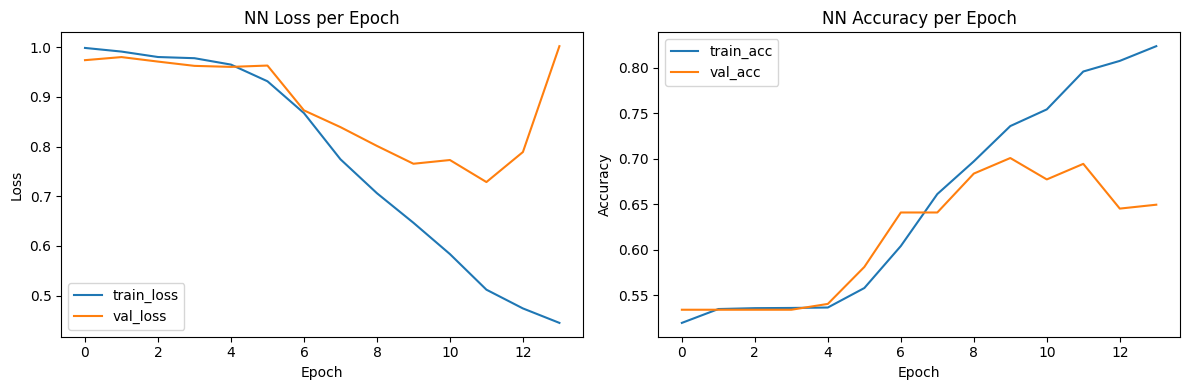

In [ ]:
# —— Neural Network Training Curves ——
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Loss
axes[0].plot(history.history['loss'],  label='train_loss')
axes[0].plot(history.history['val_loss'],label='val_loss')
axes[0].set_title("NN Loss per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()

# Accuracy
axes[1].plot(history.history['accuracy'],  label='train_acc')
axes[1].plot(history.history['val_accuracy'],label='val_acc')
axes[1].set_title("NN Accuracy per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()


🔍 Gradient Boosting Classification Report:
              precision    recall  f1-score   support

     neutral       0.68      0.92      0.78       622
    positive       0.82      0.57      0.68       372
    negative       0.45      0.17      0.24       175

    accuracy                           0.70      1169
   macro avg       0.65      0.55      0.57      1169
weighted avg       0.69      0.70      0.67      1169

▶️ Gradient Boosting Accuracy: 0.6869



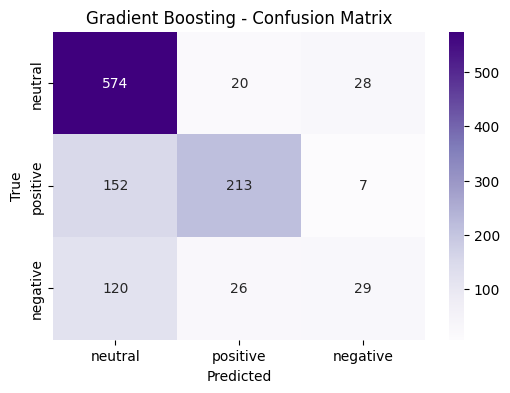

In [ ]:
#@markdown ## 🔟 Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate
y_pred_gb = gb_model.predict(X_val)

# Classification Report
print("🔍 Gradient Boosting Classification Report:")
print(classification_report(y_val, y_pred_gb, target_names=label_map.keys()))

# Calculate accuracy
accuracy = accuracy_score(y_test, lr.predict(Xte_tfidf))

# Print accuracy before confusion matrix
print(f"▶️ Logistic Regression Accuracy: {accuracy:.4f}\n")

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_gb), annot=True, fmt='d', cmap='Purples',
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
  Train Loss: 0.6355
  Val Accuracy: 0.7956

Epoch 2/5
  Train Loss: 0.3527
  Val Accuracy: 0.8015

Epoch 3/5
  Train Loss: 0.2353
  Val Accuracy: 0.7947

Epoch 4/5
  Train Loss: 0.1953
  Val Accuracy: 0.7836

Epoch 5/5
  Train Loss: 0.1759
  Val Accuracy: 0.8007



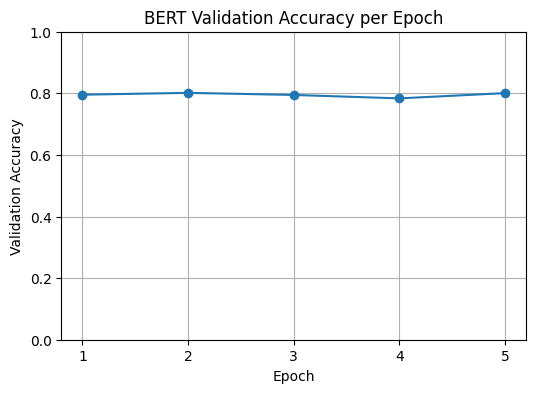

Final Classification Report:

              precision    recall  f1-score   support

     neutral       0.80      0.90      0.84       626
    positive       0.87      0.86      0.86       371
    negative       0.58      0.33      0.42       172

    accuracy                           0.80      1169
   macro avg       0.75      0.69      0.71      1169
weighted avg       0.79      0.80      0.79      1169



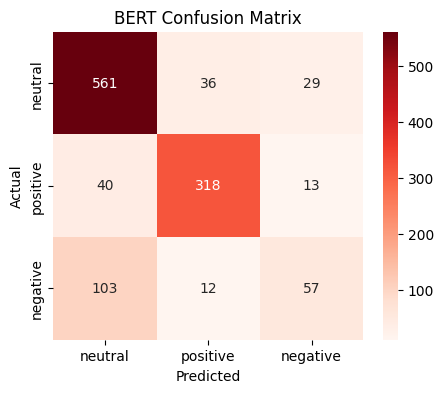

('finbert-sentiment/tokenizer_config.json',
 'finbert-sentiment/special_tokens_map.json',
 'finbert-sentiment/vocab.txt',
 'finbert-sentiment/added_tokens.json',
 'finbert-sentiment/tokenizer.json')

In [ ]:
#@markdown ## 1️⃣1️⃣  BERT Fine‑Tuning (Trainer API)
# First install required packages
!pip install transformers torch pandas scikit-learn seaborn matplotlib -q

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('financial-sentiment.csv')

# Map sentiment labels to numbers
label_map = {'neutral': 0, 'positive': 1, 'negative': 2}
df['label'] = df['Sentiment'].map(label_map)

# Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Sentence'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Initialize tokenizer & model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize texts
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings   = tokenizer(list(val_texts),   truncation=True, padding=True, max_length=128)

# Dataset class
class FinancialDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.reset_index(drop=True)
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k,v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        return item
    def __len__(self):
        return len(self.labels)

# Create dataloaders
train_dataset = FinancialDataset(train_encodings, train_labels)
val_dataset   = FinancialDataset(val_encodings,   val_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=16, shuffle=False)

# Move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop with validation accuracy tracking
epochs = 5
val_accs = []

for epoch in range(1, epochs+1):
    # Training
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for batch in val_loader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            logits = outputs.logits
            batch_preds = torch.argmax(logits, dim=1)
            preds.extend(batch_preds.cpu().numpy())
            trues.extend(labels.cpu().numpy())
    val_acc = accuracy_score(trues, preds)
    val_accs.append(val_acc)

    print(f'Epoch {epoch}/{epochs}')
    print(f'  Train Loss: {avg_train_loss:.4f}')
    print(f'  Val Accuracy: {val_acc:.4f}\n')

# Plot Validation Accuracy Curve
plt.figure(figsize=(6,4))
plt.plot(range(1, epochs+1), val_accs, marker='o')
plt.title("BERT Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.xticks(range(1, epochs+1))
plt.ylim(0,1)
plt.grid(True)
plt.show()

# Final classification report & confusion matrix
print("Final Classification Report:\n")
print(classification_report(trues, preds, target_names=['neutral','positive','negative']))

cm = confusion_matrix(trues, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['neutral','positive','negative'],
            yticklabels=['neutral','positive','negative'])
plt.title("BERT Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save model & tokenizer
model.save_pretrained('finbert-sentiment')
tokenizer.save_pretrained('finbert-sentiment')


In [ ]:
#@markdown ##  FinBERT Fine‑Tuning for Financial Sentiment Classification
#  –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# 1. Install dependencies
!pip install transformers torch pandas scikit-learn

### FinBERT Fine‑Tuning for Financial Sentiment Classification
# –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# 1. Install dependencies (uncomment if not installed)
# !pip install transformers torch pandas scikit-learn

import pandas as pd
import numpy as np
import torch

from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load & preprocess data
df = pd.read_csv('financial-sentiment.csv')
label_map = {'neutral': 0, 'positive': 1, 'negative': 2}
df['label'] = df['Sentiment'].map(label_map)

# split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Sentence'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# compute sample weights for oversampling
global_counts = np.bincount(train_labels)
class_weights = 1.0 / global_counts
sample_weights = class_weights[train_labels]
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

# 3. Tokenizer & model (finance‑specific)
MODEL_NAME = 'yiyanghkust/finbert-tone'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=3,
    problem_type='single_label_classification'
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 4. Tokenize
def tokenize_texts(texts):
    return tokenizer(
        list(texts),
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='pt'
    )

train_enc = tokenize_texts(train_texts)
val_enc   = tokenize_texts(val_texts)

# 5. Dataset class (corrected methods)
class FinancialDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.reset_index(drop=True)

    def __getitem__(self, idx):
        item = {k: v[idx].clone() for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# 6. Dataloaders
train_dataset = FinancialDataset(train_enc, train_labels)
val_dataset   = FinancialDataset(val_enc,   val_labels)

train_loader = DataLoader(
    train_dataset,
    batch_size=16,
    sampler=sampler,
    drop_last=False
)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 7. Optimizer + scheduler + weight decay
epochs = 4
total_steps = len(train_loader) * epochs
optimizer = AdamW(model.parameters(), lr=3e-5, weight_decay=0.01)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * total_steps),
    num_training_steps=total_steps
)

# 8. Training & evaluation loop
for epoch in range(1, epochs + 1):
    # Training
    model.train()
    train_loss = 0.0
    for step, batch in enumerate(train_loader, 1):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask'],
            labels=batch['labels']
        )
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_loader)

    # Validation
    model.eval()
    val_preds, val_true = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask']
            )
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            labels = batch['labels'].cpu().numpy()
            val_preds.extend(preds)
            val_true.extend(labels)

    val_acc = accuracy_score(val_true, val_preds)
    print(f"Epoch {epoch} | Train Loss: {avg_train_loss:.4f} | Val Acc: {val_acc:.4f}")
    print(classification_report(
        val_true,
        val_preds,
        target_names=['neutral', 'positive', 'negative']
    ))
    print("Confusion Matrix:")
    print(confusion_matrix(val_true, val_preds))
    print("–––––––––––––––––––––––––––––––––––––––––––––––––––––––––")

# 9. Save model & tokenizer
model.save_pretrained('finbert-sentiment')
tokenizer.save_pretrained('finbert-sentiment')

# 10. Inference function
def predict_sentiment(text: str):
    inputs = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='pt'
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1).cpu().numpy()[0]
    inv_map = {v: k for k, v in label_map.items()}
    pred = inv_map[int(probs.argmax())]
    return pred, probs

# 11. Example Usage
if __name__ == '__main__':
    text = "$AAPL afternoon selloff as usual will be brutal. get ready to lose a ton of money."
    sentiment, probabilities = predict_sentiment(text)
    print(f"Text: {text}\nPredicted: {sentiment}\nProbabilities: {probabilities}")


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Epoch 1 | Train Loss: 0.7370 | Val Acc: 0.7434
              precision    recall  f1-score   support

     neutral       0.95      0.63      0.76       626
    positive       0.79      0.85      0.82       371
    negative       0.45      0.92      0.61       172

    accuracy                           0.74      1169
   macro avg       0.73      0.80      0.73      1169
weighted avg       0.82      0.74      0.75      1169

Confusion Matrix:
[[394  75 157]
 [ 19 316  36]
 [  3  10 159]]
–––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Epoch 2 | Train Loss: 0.3341 | Val Acc: 0.7930
              precision    recall  f1-score   support

     neutral       0.90      0.75      0.82       626
    positive       0.87      0.83      0.85       371
    negative       0.51      0.86      0.64       172

    accuracy                           0.79      1169
   macro avg       0.76      0.81      0.77      1169
weighted avg       0.83      0.79      0.80      1169

Confusion Matrix:
[[47

In [ ]:
# ——  Inference Function for Your Fine‑Tuned BERT Model ——

# If you restarted your runtime, reload model & tokenizer:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# tokenizer = AutoTokenizer.from_pretrained('finbert-sentiment')
# model     = AutoModelForSequenceClassification.from_pretrained('finbert-sentiment')
# model.to(device)

# Create inverse label map
label_map_inverse = {v: k for k, v in label_map.items()}

def predict_sentiment(text: str):
    """
    Takes a raw string `text` and returns:
      - predicted label as one of ['neutral','positive','negative']
      - probability distribution over labels as a NumPy array
    """
    # Tokenize & prepare tensors
    inputs = tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        padding='max_length',
        max_length=128
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Forward pass (inference)
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits  = outputs.logits

    # Convert to probabilities
    probs = torch.nn.functional.softmax(logits, dim=-1).cpu().numpy()[0]
    pred = int(probs.argmax())

    return label_map_inverse[pred], probs

# 🧪 Example Usage (paste right after this function)
sample_text = "The market rally is unbelievable, stocks are soaring!"
sentiment, probabilities = predict_sentiment(sample_text)
print(f"Input: {sample_text}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Probabilities (neutral, positive, negative): {probabilities}")


Input: The market rally is unbelievable, stocks are soaring!
Predicted Sentiment: positive
Probabilities (neutral, positive, negative): [2.0170785e-03 9.9712038e-01 8.6260197e-04]
